In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

import geoplot as gplt
import matplotlib as plt

In [3]:
csv_file = pd.read_csv('mat-do-dan-so.csv')
csv_file.rename(columns={'province' : 'ten_tinh'}, inplace=True)
csv_file.head(10)

,ten_tinh,density
0,CẢ NƯỚC,280.0
1,Đồng bằng sông Hồng,994.0
2,Hà Nội,2182.0
3,Vĩnh Phúc,863.0
4,Bắc Ninh,1432.0
5,Quảng Ninh,198.0
6,Hải Dương,1070.0
7,Hải Phòng,1268.0
8,Hưng Yên,1258.0
9,Thái Bình,1128.0


In [4]:
csv_file.shape

(70, 2)

In [5]:
geoFile = gpd.read_file('diaphantinh.geojson')
geoFile.head(10)

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."
5,6,AD01,Bắc Ninh,"MULTIPOLYGON (((106.03246 21.22488, 106.03217 ..."
6,7,AD01,Bến Tre,"MULTIPOLYGON (((106.42508 10.32019, 106.44474 ..."
7,8,AD01,Bình Định,"MULTIPOLYGON (((109.36862 13.59160, 109.36824 ..."
8,9,AD01,Bình Dương,"MULTIPOLYGON (((106.43608 11.50210, 106.44327 ..."
9,10,AD01,Bình Phước,"MULTIPOLYGON (((107.21940 12.20223, 107.22417 ..."


In [6]:
a = list (geoFile['ten_tinh'])
b = list(csv_file['ten_tinh'])
count = 0
for i in b:
    if i not in a :
        print ('{}'.format(i))
        count += 1
# print (a)
print (a)
print (count)


CẢ NƯỚC
Đồng bằng sông Hồng
Trung du và miền núi phía Bắc
Hoà Bình
Bắc Trung Bộ và Duyên hải miền Trung
Thanh Hoá
Quảng Bình
Thừa Thiên - Huế
Khánh Hoà
Tây Nguyên
Đắk Lắk
Đắk Nông
Đông Nam Bộ
Bà Rịa - Vũng Tàu
Đồng bằng sông Cửu Long
Kiên Giang
Cần Thơ
['An Giang', 'Bà Rịa -Vũng Tàu', 'Bắc Giang', 'Bắc Kạn', 'Bạc Liêu', 'Bắc Ninh', 'Bến Tre', 'Bình Định', 'Bình Dương', 'Bình Phước', 'Bình Thuận', 'Cà Mau', 'Cần Thơn', 'Cao Bằng', 'Đà Nẵng', 'Đăk Lăk', 'Đăk Nông', 'Điện Biên', 'Đồng Nai', 'Đồng Tháp', 'Gia Lai', 'Hà Giang', 'Hà Nam', 'Hà Nội', 'Hà Tĩnh', 'Hải Dương', 'Hải Phòng', 'Hậu Giang', 'Hòa Bình', 'Hưng Yên', 'Khánh Hòa', 'Kien Giang', 'Kon Tum', 'Lai Châu', 'Lâm Đồng', 'Lạng Sơn', 'Lào Cai', 'Long An', 'Nam Định', 'Nghệ An', 'Ninh Bình', 'Ninh Thuận', 'Phú Thọ', 'Phú Yên', 'Quản Bình', 'Quảng Nam', 'Quảng Ngãi', 'Quảng Ninh', 'Quảng Trị', 'Sóc Trăng', 'Sơn La', 'Tây Ninh', 'Thái Bình', 'Thái Nguyên', 'Thanh Hóa', 'Thừa Thiên Huế', 'Tiền Giang', 'TP. Hồ Chí Minh', 'Trà Vinh', 'Tu

In [7]:
geoFile.shape

(63, 4)

In [8]:
corrections = {
    'Bà Rịa -Vũng Tàu': 'Bà Rịa - Vũng Tàu',
    'Cần Thơn': 'Cần Thơ',
    'Hòa Bình': 'Hoà Bình',
    'Khánh Hòa': 'Khánh Hoà',
    'Kien Giang': 'Kiên Giang',
    'Quản Bình': 'Quảng Bình',
    'TP. Hồ Chí Minh': 'TP.Hồ Chí Minh',
    'Thanh Hóa': 'Thanh Hoá',
    'Đăk Lăk': 'Đắk Lắk',
    'Đăk Nông': 'Đắk Nông',
    'Thừa Thiên Huế' : 'Thừa Thiên - Huế'
}
for name in geoFile['ten_tinh']:
    if name in corrections:
        geoFile['ten_tinh'] = geoFile['ten_tinh'].replace(to_replace = name, value = corrections[name])
geoFile.head()


,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa - Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [17]:
data = geoFile.merge(csv_file, on= 'ten_tinh')
data.head()

,gid,code,ten_tinh,geometry,density
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",611.0
1,2,AD01,Bà Rịa - Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",551.0
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",426.0
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",66.0
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",332.0


Text(0, 0.5, 'Province code')

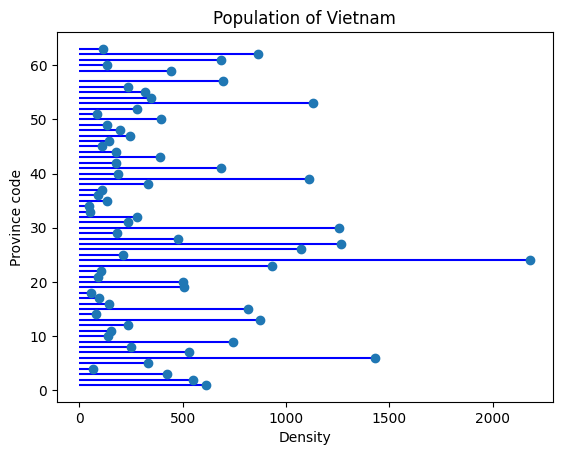

In [18]:
import matplotlib.pyplot as plt 

density = data.density
# my_range = range(1,len(data.index) + 1 )
gid = data.gid

plt.hlines(y = gid, xmin= 0, xmax=density, colors='blue')
plt.plot(density, gid, "o")

plt.title ("Population of Vietnam")
plt.xlabel ('Density')
plt.ylabel('Province code')


In [12]:
import plotly.express as px
fig = px.bar(data, x = 'ten_tinh', y= 'density')
fig.show()

<AxesSubplot: >

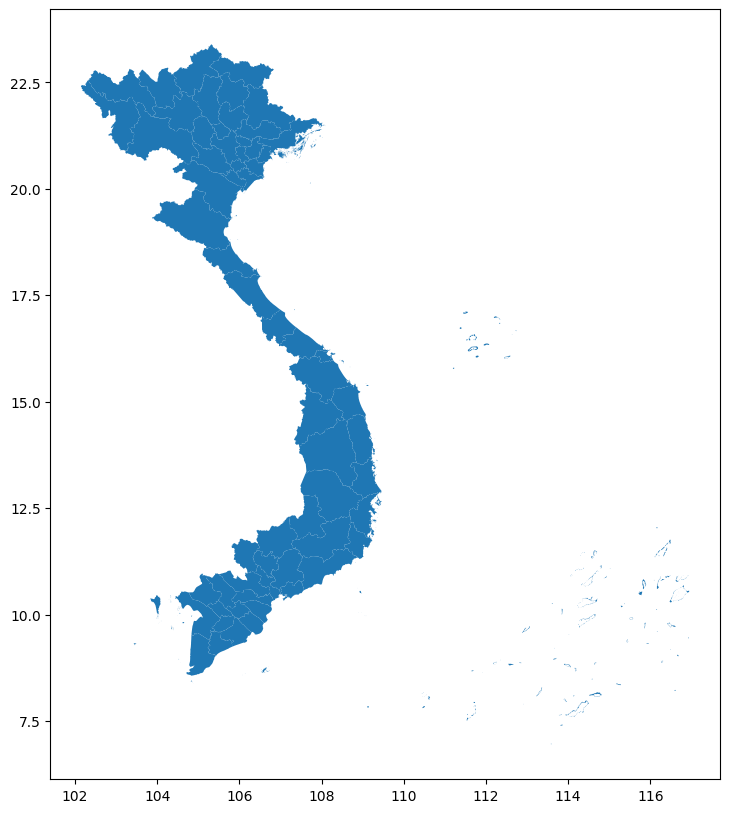

In [13]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mapclassify as mc

geoData = gpd.read_file('diaphantinh.geojson')
# gplt.polyplot(geoData, figsize = (20, 4))
geoData.plot(figsize = (20,10))
# plt.savefig('out.pdf')

# data = pd.read_csv('mat-do-dan-so.csv')

# fulldata = geoData.merge(data, left_on = ['ten_tinh'], right_on = ['province'])

# fig, ax = plt.subplot (1,1,figsize = (16, 12))
# scheme = mc.Quantiles(fulldata['density'], k = 10)

# gplt.choropleth(fulldata, hue = 'density', linewidth= .1, scheme = scheme, cmap = 'inferno_r', legend=True, edgecolor = 'black', ax = ax)
# ax.set_title ('Viet Nam')

<AxesSubplot: >

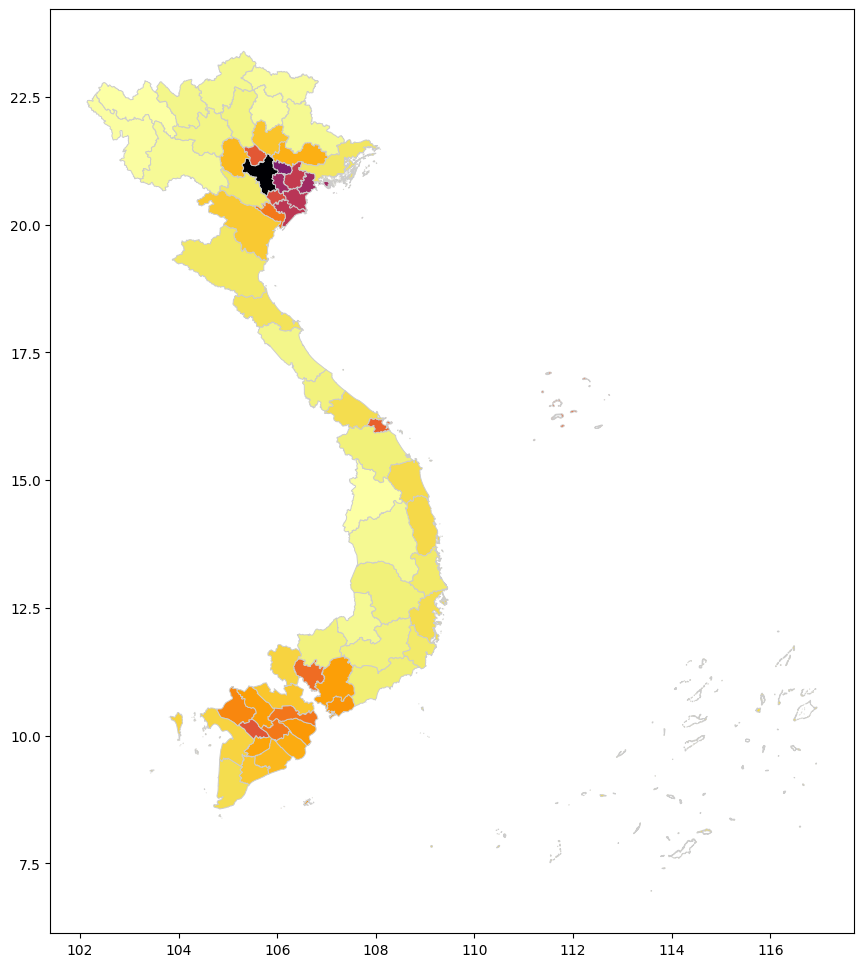

In [19]:
# data = pd.read_csv('mat-do-dan-so.csv')
# fulldata = geoData.merge(data, left_on = ['ten_tinh'], right_on = ['province'])

fig, ax = plt.subplots (1,figsize = (16, 12))
scheme = mc.Quantiles(data['density'], k = 10)

# gplt.choropleth(fulldata, hue = 'density', linewidth= .1, scheme = scheme, cmap = 'inferno_r', legend=True, edgecolor = 'black', ax = ax)
# ax.set_title ('Viet Nam')
data.plot (column = 'density', cmap = 'inferno_r', linewidth = 0.7, ax = ax,edgecolor= '0.8' )